In [1]:
import pandas as pd

In [2]:
#Загрузка датасета
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [3]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [4]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [5]:
print(user_data.shape)
print(logs.shape)
print(user_data.dtypes)
print(logs.dtypes)

(2954, 3)
(4500, 4)
client     int64
premium     bool
age        int64
dtype: object
client       int64
success       bool
platform    object
time         int64
dtype: object


In [6]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [7]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [8]:
logs.platform.nunique()

3

In [9]:
count_success = logs[logs.success == True].groupby('client', as_index=False) \
    .success.count() \
    .sort_values('success')
id_success = count_success[count_success.success == count_success.success.max()].client.to_list()
print(sorted(id_success))

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]


In [10]:
success_platform = logs[logs.success].platform \
    .value_counts().idxmax()
success_platform

'phone'

In [11]:
merge_data = logs.merge(user_data, how='inner', on='client')
prem_plat =  merge_data.loc[merge_data.premium == True] \
    .platform.value_counts().idxmax()
merge_data

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,35604,False,phone,1585459894,True,65
2,10931,True,computer,1585468629,False,28
3,41928,True,phone,1585446772,False,46
4,48925,True,phone,1585467880,False,33
...,...,...,...,...,...,...
3434,92584,True,computer,1585408896,False,28
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

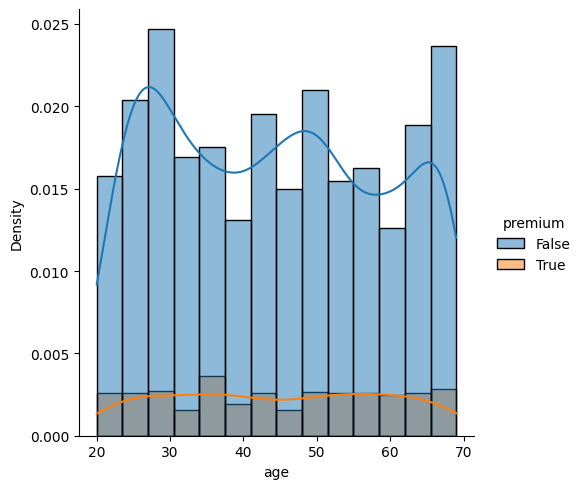

In [13]:
sns.displot(data=merge_data, x='age', hue='premium', kde=True, kind='hist', stat='density', bins=14)

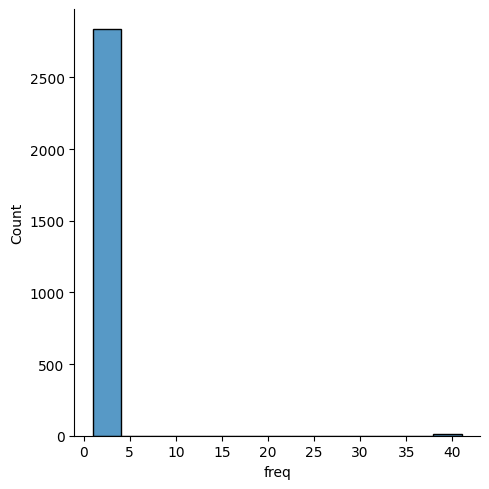

In [14]:
success_user = logs[logs.success == True].client.value_counts().reset_index()\
    .rename(columns={'count':'freq'})

sns.displot(data=success_user, x='freq')

<Axes: xlabel='age', ylabel='count'>

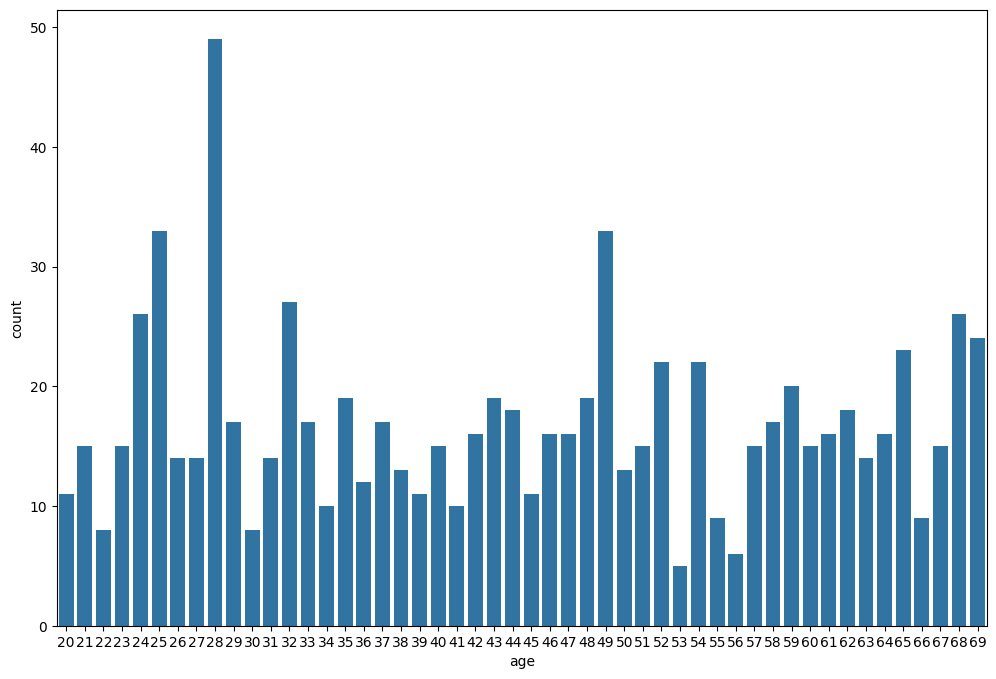

In [15]:
plt.figure(figsize=(12, 8))
age_count = merge_data[(merge_data.platform == 'computer') & (merge_data.success == True)]
sns.countplot(data=age_count, x='age')